In [22]:
import numpy as np
import base64
from PIL import Image
import io

def cifar10_to_base64_images(img_arr):
    # Create an empty list to hold the base64-encoded image strings
    img_base64_list = []
    # Loop over each image in the array
    for i in range(img_arr.shape[0]):
        # Convert the NumPy array to a PIL Image object
        img = Image.fromarray(np.uint8(img_arr[i] * 255))
        # Create a BytesIO object to hold the image data
        img_bytes = io.BytesIO()
        # Save the image to the BytesIO object in PNG format
        img.save(img_bytes, format='PNG')
        # Encode the image data in base64
        img_base64 = base64.b64encode(img_bytes.getvalue()).decode('utf-8')
        # Append the base64-encoded image string to the list
        img_base64_list.append(img_base64)
    # Return the list of base64-encoded image strings
    return img_base64_list

def numpy_to_base64_image(arr):
    # Reshape the 1D array to a 3D array of shape (32, 32, 3)
    arr = np.uint8(arr * 255)
    img_arr = arr.reshape((3, 32, 32)).transpose([1, 2, 0]) 
    # Convert the NumPy array to a PIL Image object
    img = Image.fromarray(img_arr)
    # Create a BytesIO object to hold the image data
    img_bytes = io.BytesIO()
    # Save the image to the BytesIO object in PNG format
    img.save(img_bytes, format='PNG')
    # Encode the image data in base64
    img_base64 = base64.b64encode(img_bytes.getvalue()).decode('utf-8')
    # Return the base64-encoded image string
    return img_base64


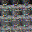

In [26]:
import numpy as np

# Assuming your 1D NumPy array of shape (3072,) containing multiple CIFAR-10 images
# image_array = data
image_array = data[1]
# Convert the array to a list of base64-encoded PNG images
# image_base64_list = cifar10_to_base64_images(image_array)
image_base64 = numpy_to_base64_image(image_array)
# Display the first image in Jupyter Notebook or any other compatible environment
from IPython.display import HTML
# html_image = '<img src="data:image/png;base64,{0}">'.format(image_base64_list[0])
html_image = '<img src="data:image/png;base64,{0}">'.format(image_base64)
HTML(html_image)


In [2]:
import h5py
import numpy as np
f = h5py.File('CIFAR11_dataset.mat','r')
data = f.get('Xtrain')
data = np.array(data)
print(data.shape)

(55000, 3072)


In [23]:

# Assuming your 1D NumPy array of shape (3072,) containing a single CIFAR-10 image
image_array = data[-2]

# Check the shape of the array
print(image_array.shape)  # Output: (3072,)

base64_str = numpy_to_base64_image(image_array)



print(base64_str)

(3072,)
iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2jAAAJG0lEQVR4nAXBWY9l1XUA4LX2eKY7DzVX0d1pJhNjMDY2D36xElvCSFYky1Ge8wuTR0tYdkZZMhAwAkQ33U111a26t4Y7nGGPa+f78Le//1eGjDNGEDOJ+9NqNh2cnT3WmmnNuSyXq/r85XJbN/ebrutMnudHx4fT/cOiGmwXX91ffx3MZlfvbtd2/+jx3t6BUhIAfIzBB6IklNSRKKYICQSj4aAoimy7u+nDqKzG1WA0Hu+98fqrxtjlav3p5988/e759SWLMb7xeiZHExZPz7/78vriimV9QEgAQkjOGY/BMxZCFAkIIBEReY+5GAxnZZkLJeeHDyezI0QIZqe1Hg6GR8fH8/nsz//BO0t5JvrCQk+TG12K3JqoJXrvrTO51pwzRMY5S0QihgAI5G0Ibjp9ZTY7UJmeHxxnWenMzrQbRsHXzGU6L8vTo/E//vL95Wrz7bPrxrj9eT/RsCr6RdXP++MYorMuFEGhEpwjICQQMQYADMGTt6ar6/oOa9YfjqJr67sFUpBMSsQOYM0RBUcuBmX+ysn0xfdXq+X1K6fHXKqirEbTmXHkXTDGKKWVkohIFAV5l4ARxXp3/8lfXz759ssP3nk3ddtq1BdI/f44L3ssQIpx124X1xfj2aTXGx4fHO7q9t/+/T/xv/7HmrZUYZiQcR4pWmtjDIgKABCZCDFQAojkYri9vlteLV47PBoP+9bs+kWuVD7eOymLfrK+uUi3t7cHJ2cqLxO5B2d7RZF//Me/CM01x0+/fFH1qlfOTge9Xoh0enyklaDIREoUQxBC57pChPFgPpzvD6fj82dPVsvLedsIKd58+xflrLpaXjvr+6PpYDiN0UiRfvvRr1Y3q8+++CII4brdcrm6uLwGckqKD3/z0fvvvcs4CSRKwVKiQaXHb/3gvXd+sn8weXnx/JunzxeLq8n4vD8Ye9vl

In [25]:
import base64
from PIL import Image
from io import BytesIO

# assume the base64 string is stored in the variable "base64_string"

# decode the base64 string to bytes
img_bytes = base64.b64decode(base64_str)

# read the bytes as an image using PIL (Python Imaging Library)
img = Image.open(BytesIO(img_bytes))

# show the image
img.show()


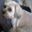

In [26]:
from IPython.display import display, Image
import base64
from PIL import Image as PilImage
from io import BytesIO

# assume the base64 string is stored in the variable "base64_string"
# decode the base64 string to bytes
img_bytes = base64.b64decode(base64_str)

# read the bytes as an image using PIL (Python Imaging Library)
img = PilImage.open(BytesIO(img_bytes))

# display the image
display(img)


(3072,)


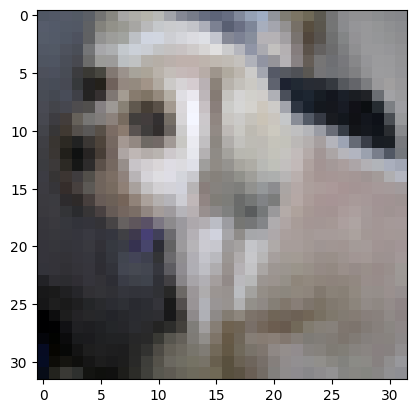

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Assuming your 1D NumPy array of shape (3072,) containing a single CIFAR-10 image
image_array = data[-2]

# Check the shape of the array
print(image_array.shape)  # Output: (3072,)

img = image_array.reshape(3,32,32).transpose([1, 2, 0]) 
plt.imshow(img)
plt.show()